In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
warnings.filterwarnings("ignore")


In [12]:
path = "movie_success_rate.csv"  
df = pd.read_csv(path)
df.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,1,0,0,0,0,1
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,1,0,1,0,0,0,0,1
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,1,0,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [16]:
df = df.rename(columns={
    'Revenue (Millions)': 'Revenue_Millions',
    'Runtime (Minutes)': 'Runtime_Minutes'
})

In [18]:
df = df[['Title', 'Director', 'Runtime_Minutes', 'Rating',
         'Revenue_Millions', 'Action', 'Adventure', 'Comedy',
         'Family', 'Horror', 'Sport', 'Success']]
df.head()

,Title,Director,Runtime_Minutes,Rating,Revenue_Millions,Action,Adventure,Comedy,Family,Horror,Sport,Success
0,Guardians of the Galaxy,James Gunn,121,8.1,333.13,1,1,0,0,0,0,1
1,Prometheus,Ridley Scott,124,7.0,126.46,0,1,0,0,0,0,1
2,Split,M. Night Shyamalan,117,7.3,138.12,0,0,0,0,1,0,0
3,Sing,Christophe Lourdelet,108,7.2,270.32,0,0,1,1,0,0,0
4,Suicide Squad,David Ayer,123,6.2,325.02,1,1,0,0,0,0,0


In [24]:
imd = df.copy()

title_encoder = LabelEncoder()
director_encoder = LabelEncoder()

imd['Title'] = title_encoder.fit_transform(imd['Title'])
imd['Director'] = director_encoder.fit_transform(imd['Director'])

imd.head()


,Title,Director,Runtime_Minutes,Rating,Revenue_Millions,Action,Adventure,Comedy,Family,Horror,Sport,Success
0,236,208,121,8.1,333.13,1,1,0,0,0,0,1
1,477,417,124,7.0,126.46,0,1,0,0,0,0,1
2,552,317,117,7.3,138.12,0,0,0,0,1,0,0
3,535,85,108,7.2,270.32,0,0,1,1,0,0,0
4,569,109,123,6.2,325.02,1,1,0,0,0,0,0


In [26]:

X = imd.iloc[:, 0:11]   
y = imd['Success']    


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (670, 11)
X_test shape : (168, 11)
y_train shape: (670,)
y_test shape : (168,)


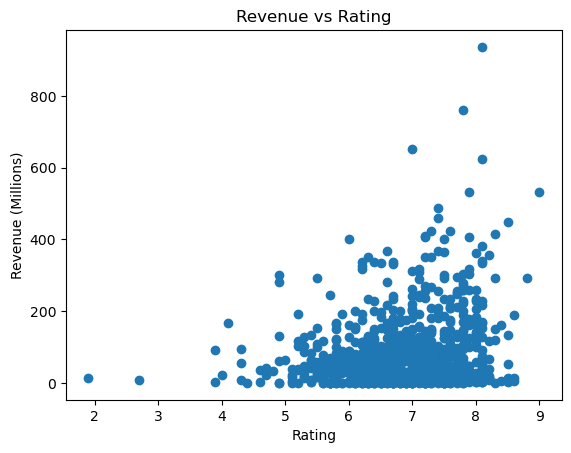

In [28]:


plt.figure()
plt.scatter(df['Rating'], df['Revenue_Millions'])
plt.xlabel("Rating")
plt.ylabel("Revenue (Millions)")
plt.title("Revenue vs Rating")
plt.show()


Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest : 0.9464285714285714

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       133
           1       0.88      0.86      0.87        35

    accuracy                           0.95       168
   macro avg       0.92      0.91      0.92       168
weighted avg       0.95      0.95      0.95       168



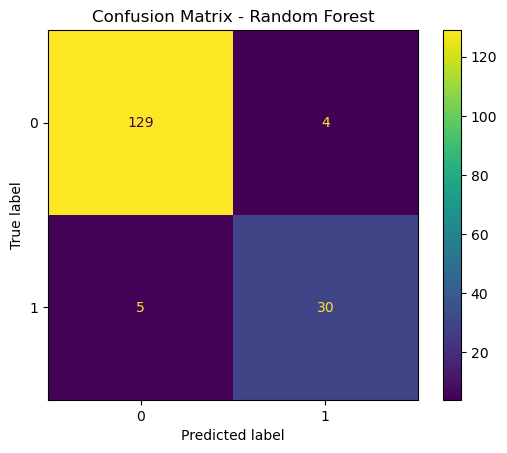

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

trainacc_rf = accuracy_score(y_train, y_pred_rf_train)
testacc_rf = accuracy_score(y_test, y_pred_rf_test)

print("Training Accuracy of Random Forest:", trainacc_rf)
print("Testing Accuracy of Random Forest :", testacc_rf)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf_test))

cm_rf = confusion_matrix(y_test, y_pred_rf_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


Accuracy of SVM: 0.8511904761904762
Confusion Matrix for SVM:
 [[129   4]
 [ 21  14]]


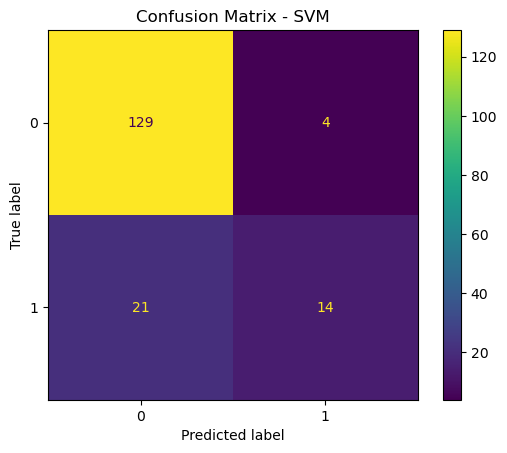

In [32]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", svm_acc)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", cm_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()


Accuracy of KNN: 0.8630952380952381
Confusion Matrix for KNN:
 [[128   5]
 [ 18  17]]


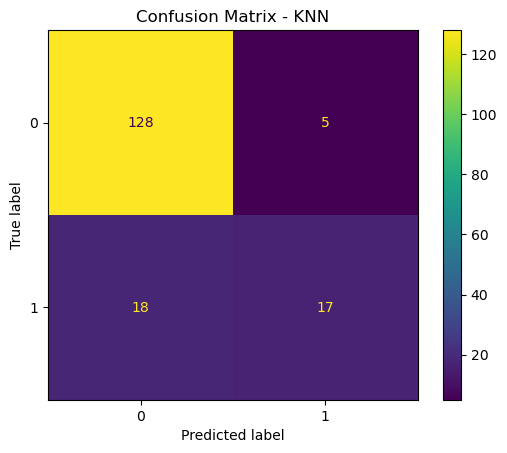

In [34]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", knn_acc)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()


In [36]:

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

clf = HistGradientBoostingClassifier()
clf.fit(X_train_imputed, y_train)

y_pred_hgb = clf.predict(X_test_imputed)
hgb_acc = accuracy_score(y_test, y_pred_hgb)

print("Accuracy of HistGradientBoosting:", hgb_acc)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_hgb))


Accuracy of HistGradientBoosting: 0.9583333333333334

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       133
           1       0.91      0.89      0.90        35

    accuracy                           0.96       168
   macro avg       0.94      0.93      0.94       168
weighted avg       0.96      0.96      0.96       168



In [38]:
print("MODEL ACCURACY COMPARISON\n")

print(f"Random Forest Accuracy : {testacc_rf}")
print(f"SVM Accuracy           : {svm_acc}")
print(f"KNN Accuracy           : {knn_acc}")


✅ MODEL ACCURACY COMPARISON

Random Forest Accuracy : 0.9464285714285714
SVM Accuracy           : 0.8511904761904762
KNN Accuracy           : 0.8630952380952381


In [40]:

input_data = pd.DataFrame({
    'Title': title_encoder.transform([df['Title'].iloc[0]])[0:1],
    'Director': director_encoder.transform([df['Director'].iloc[0]])[0:1],
    'Runtime_Minutes': [120],
    'Rating': [7.5],
    'Revenue_Millions': [150],
    'Action': [1],
    'Adventure': [1],
    'Comedy': [0],
    'Family': [0],
    'Horror': [0],
    'Sport': [0]
})

input_data_imputed = imputer.transform(input_data)

prediction = clf.predict(input_data_imputed)

if prediction[0] == 1:
    print("🎬 Movie Prediction: SUCCESS")
else:
    print("🎬 Movie Prediction: FAIL")


🎬 Movie Prediction: SUCCESS


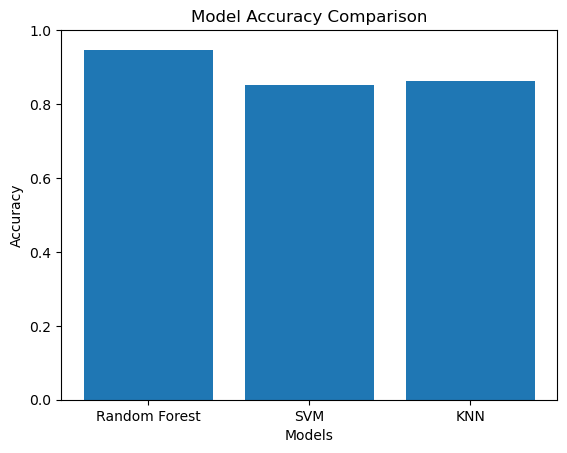

In [42]:
models = ['Random Forest', 'SVM', 'KNN']
accuracies = [testacc_rf, svm_acc, knn_acc]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


In [44]:

import joblib

joblib.dump(rf, "random_forest_movie_success_model.pkl")

joblib.dump(title_encoder, "title_encoder.pkl")
joblib.dump(director_encoder, "director_encoder.pkl")
joblib.dump(imputer, "imputer.pkl")

print("Model, encoders, and imputer saved successfully!")


✅ Model, encoders, and imputer saved successfully!
